## **Project Details:**
**Title:** Guided Project

**Due Date:** 9 May 2024

**Contributors:** Marcus Mahlatjie (577296) and Zoë Treutens (577989)

**GitHub Link:** https://github.com/Zoe21354/SeperateMLG2Project.git

**Note to Lecturer:**
To whom ever is marking this project please kindly note that the other students assigned to our group (F) have not contributed to this work and is solely done by the above mentioned students. This is due to...

===================================================================================

# **Streamlining BC Finance’s Home Loan Eligibility Process**
BC Finance Company provides financial services across all home loan categories. Offering services to clients in urban, semi-urban, and rural areas, the organization has many facets. The organization currently uses an **ineffective manual** procedure to validate customers' eligibility. The procedure entails the client submitting an application for a home loan by answering questions and supplying personal information. These responses must then go through a lengthy validation process and this can be a problem for handling multiple applications leading to decreased customer satisfaction, manual errors and **lengthy application times** which could lead to customers seeking other financial institutes to provide financial services for their needs.

The organization is working to create an **automated system** that can accurately determine a customer's eligibility for a home loan in real time in order to address this problem. To ascertain if a customer is eligible for a loan, this system will examine a number of customer variables, including gender, marital status, education, number of dependents, income, loan amount, credit history, and others.

The principal aim is to divide clients into discrete categories according to their loan quantum eligibility. By doing this, BC Finance hopes to **efficiently and successfully target** these consumer segments and provide them with loan products and services that are customized to their unique requirements and preferences. BC Finance hopes to improve client happiness, reduce manual errors, and streamline its lending procedures for long-term profitability and growth by putting in place an automated loan qualifying system.

This notebook will take the following structure:

    1. Prepare Data (Data Analysis)
        A. Dataset Analysis
        B. Univariate Analysis
        C. Bi-variate Analysis
    2. Hypotheses
    3. Preprocess Data (Data Cleaning)
        A. Handling missing values
        B. Removing duplicates
        C. Outlier value Handling
    4. Split Dataset
    5. Model 1
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Create Pickle File
    6. Model 2
        A. Build Model
        B. Predictions of the Model
        C. Feature Importance from the Model
        D. Create Pickle File
    10. Validate the Model
    11. Web Application

===================================================================================

# **1. Prepare Data**

Before any coding can take place, certain libraries in python need to be imported to perform different functions and make various features available for use.

In [2]:
# Import Libraries
import csv                                                              # Handles CSV file operations
import pandas as pd                                                     # Data manipulation and analysis
import numpy as np                                                      # Performs mathematical operations
import matplotlib.pyplot as plt                                         # Creates static, animated, and interactive visualizations
import seaborn as sns                                                   # Creates attractive and informative statistical graphics
from sklearn.model_selection import train_test_split                    # Splits data into random train and test subsets
from scipy import stats                                                 # Provides statistical functions
import pickle                                                           # Serializes and de-serializes Python object structures
from sklearn.model_selection import StratifiedKFold, cross_val_predict  # Provides train/test indices to split data in train/test sets
from sklearn.linear_model import LogisticRegression                     # Implements logistic regression
from sklearn.metrics import accuracy_score                              # Computes subset accuracy classification score
from tensorflow.keras.models import Sequential                          # Base class for building neural network models
from tensorflow.keras.layers import Dense                               # Implements the operation: output = activation(dot(input, kernel) + bias)
from sklearn import tree                                                # Contains classes for different decision tree algorithms
import warnings                                                         # Handles warnings during runtime
warnings.filterwarnings('ignore')                                       # Ignores displaying warnings

The CSV files named raw_data and validation_data are read so that the unclean data contained in these files can be analyses.

In [3]:
# Read Unclean CSV Files
raw_data = pd.read_csv("raw_data.csv")
raw_data_copy = raw_data.copy()

validation_data = pd.read_csv("validation.csv")
validation_data_copy = validation_data.copy()

**DATA ANALYSIS PROCESSES**

Performing data analysis on unclean data is essential, as it will provide pertinant information regarding the data we are to use. Although, data cleaning is an essential step in the data analysis process, understanding your data before you clean it can make the process more efficient and effective.

***Understanding the Data*** 
It allows you to understand the nature and structure of your data. You can identify the types of variables you have, their distribution, and how they relate to each other.

***Identifying Errors and Anomalies*** 
Unclean data can contain errors, outliers, or anomalies that need to be addressed. By analysing the data first, you can identify these issues and plan how to handle them during the cleaning process.

***Determining Cleaning Strategies*** 
Not all data requires the same cleaning procedures. Analysing the data can help you determine the most appropriate cleaning strategies for your specific dataset.

***Preserving Valuable Information*** 
Sometimes, what might initially appear as an error or outlier could actually be a valuable piece of information. Analysing the data before cleaning ensures that you don’t inadvertently remove these insights.

***Improving Model Accuracy***
Unclean data can lead to inaccurate models. By analysing and cleaning your data, you can improve the accuracy of your subsequent models.

## A. Dataset Analysis
### *Dataset Attributes:*
Each attribute in the dataset represents a different variable. Understanding these attributes helps you understand the variables you’re working with, what they represent, and how they might relate to your research question or problem statement.

  - Feature Variable (Independent variables) are variables that stand alone and are not changed by other variables that are being 
    measured. They are denoted as X in ML algorithms.
  - Target Variables (Dependent variables) are the variables that are to be predicted. It is often denoted as Y in ML algorithms.

In [4]:
print(f"Raw Data Columns:\n{raw_data_copy.columns}\n")
print(f"Validation Data Columns:\n{validation_data_copy.columns}\n")

Raw Data Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Validation Data Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')



***Insight Gained:***
  - In both datasets, the attribute names are written inconsistently. Some attributes have underscores between each word ie. 
    Loan_ID and other attributes use PascalCase i.e ApplicantIncome. This will need to be standardized in the data processing 
    section.
  - For both datasets, there are 12 feature variables but only the "raw_data" dataset has 1 target variable.
  - The target variable in the raw_data dataset is the Loan_Status attribute.
  - This variable will be predicted using models for the "validation_data" dataset.

### *Dataset Datatypes:*
Attributes can have different data types, such as numerical, categorical, or ordinal. Knowing the data type of each attribute is important because it determines what kind of statistical analysis or data processing is appropriate. Learning the different datatypes for each attribute in both of the datasets will provide insight into the consistance of the datattypes for each specific attribute.

In [5]:
print(f"Raw Dataset Datatypes:\n{raw_data_copy.dtypes}\n")
print(f"Validation Dataset Datatypes:\n{validation_data_copy.dtypes}\n")

Raw Dataset Datatypes:
Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Validation Dataset Datatypes:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object



***Insight Gained:***
  - There is a discrepancy between the two datasets: the "Dependents" attribute is of datatype float64 in the "raw_data" dataset 
    but of datatype object is seen in the "validation_data" file.
  - This could lead to potentially issues when modeling, as the model might be expecting the same datatype for a given attribute.
  - This discrepancy will need to be fixed in the data processing section.

### *Dataset Shape:*
Knowing the number of rows in your datasets provides you with an idea of the volume of the data available to you. More rows mean more data, which can lead to more robust and reliable models. However, it can also mean more computational resources and time required for processing. On the other hand knowing the number of columns in the dataset informs the user on the number of features (or variables) available. Overall the analysis of the shape of the dataset can help in assessing the quality of the data.

For example, if you have many rows but few columns, you might not have enough features to build a good model. Conversely, having a large number of columns compared to rows could lead to overfitting.

In [6]:
print(f"Raw Data Shape: {raw_data_copy.shape}\n")
print(f"Validation Data Shape:{validation_data_copy.shape}")

Raw Data Shape: (614, 13)

Validation Data Shape:(367, 12)


***Insight Gained:***
- Raw Data Shape: 614 rows and 13 columns
- Validation Data Shape: 367 rows and 12 columns
- There is exactly 1 less column in the "validation_data" file which is the target attribute.

## B. Univariate Analysis
Univariate analysis is the process of analysising individual (one variable) at a time. This is the most basic type of data analysis to  finds patterns in the data.

Analyzing univariate data involves examining the frequency of data in the dataset. In order to do this the count for each category in the attribute is found. Following this the data is normalized to get the proportion of the different categories through the division of the count by the total number of values. Lastly a bar chart is plotted to visualise the data.

### *Dependent (Target) Attribute:*

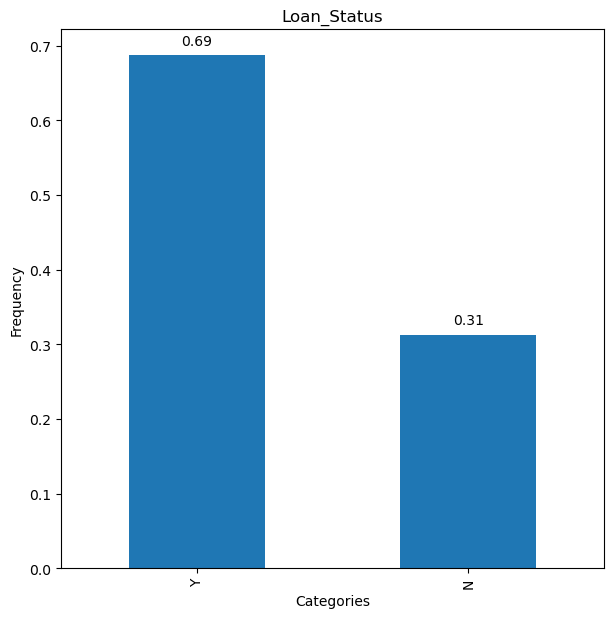

In [7]:
count = raw_data_copy['Loan_Status'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title = 'Loan_Status', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.69 or 69% of the people were approved for a loan (i.e Loan_Status = Yes)
- 0.31 or 31% of the people were not approved for a loan (i.e Loan_Status = No)

### *Independent Attributes (Categorical):*
Categorical data is a type of data that is qualitative and has no numerical values. It can be divided into categories but cannot be ordered or measured. For examples, 
    
- Colour category can include: red, blue, or green
- Gender category can include: male or female

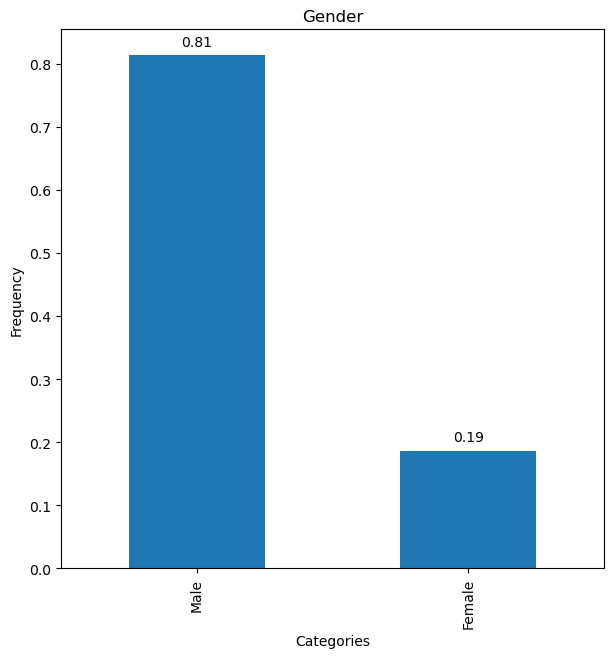

In [8]:
# Gender Attribute
count = raw_data_copy['Gender'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title = 'Gender', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.81 or 81% of the people are male (i.e Gender = Male)
- 0.19 or 19% of the people are female (i.e Gender = Female)

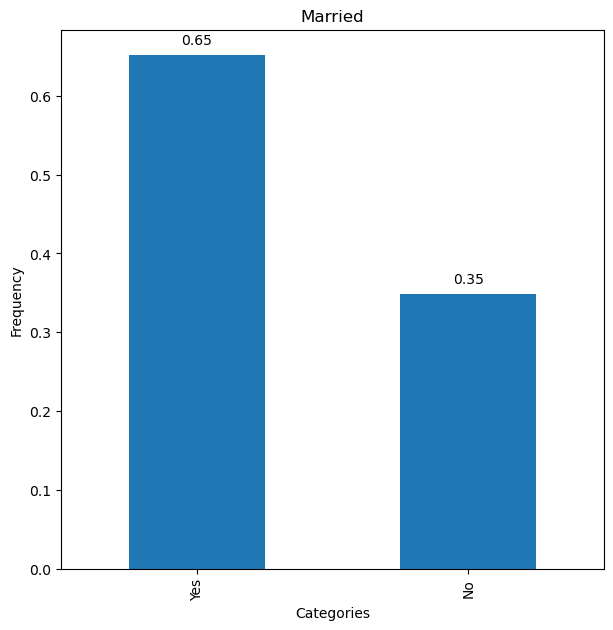

In [9]:
# Married Attribute
count = raw_data_copy['Married'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Married', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.65 or 65% of the people were Married (i.e Married = Yes)
- 0.35 or 35% of the people were not Married (i.e Married = No)

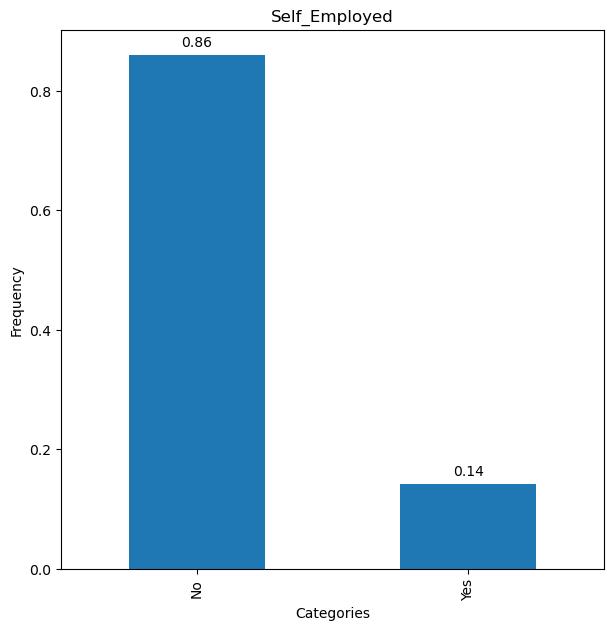

In [10]:
# Self_Employed Attribute
count = raw_data_copy['Self_Employed'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Self_Employed', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.14 or 14% of the people are self-employed (i.e Self_Employed = Yes)
- 0.86 or 86% of the people are not self-employed (i.e Married = No)

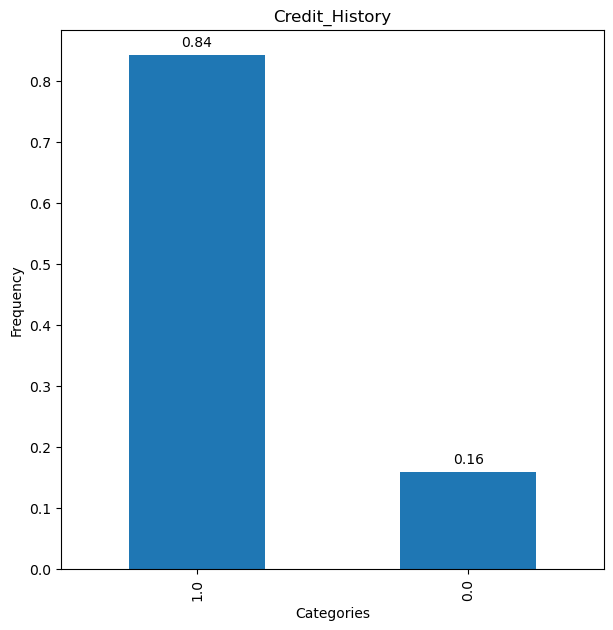

In [11]:
# Credit_History Attribute
count = raw_data_copy['Credit_History'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Credit_History', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.84 or 84% of the people have a credit history (i.e Credit_History = 1)
- 0.16 or 16% of the people don't have a credit history (i.e Credit_History = 0)

### *Independent Attributes (Ordinal):*
Ordinal data have a clear ordering or hierarchy in the categories. For example, customer satisfaction ratings can include: unsatisfied, neutral, or satisfied.

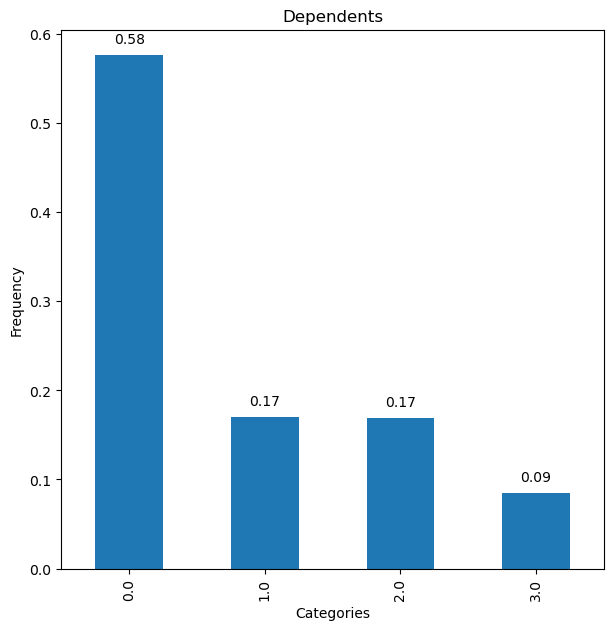

In [12]:
# Dependents Attribute
count = raw_data_copy['Dependents'].value_counts('normalize = True')
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Dependents', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.58 or 58% of the people don't have Dependent (i.e Dependents = 0)
- 0.17 or 17% of the people has only one Dependent (i.e Dependents = 1)
- 0.17 or 17% of the people has two Dependents (i.e Dependents = 2)
- 0.09 or 9% of the people has three or more Dependents (i.e Dependents = 3+)

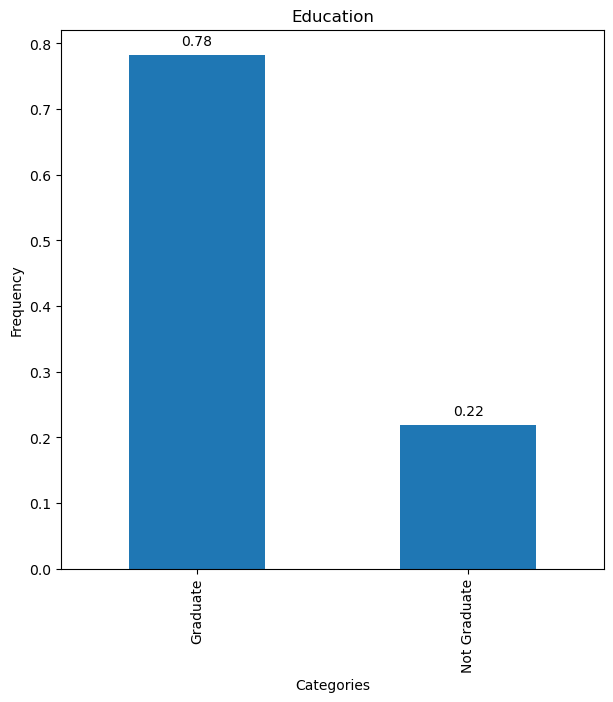

In [13]:
# Education Attribute
count =raw_data_copy['Education'].value_counts('normalize = True')
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Education', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.78 or 78% of the people have graduated (i.e Education = Graduate)
- 0.22 or 22% of the people have not graduated (i.e Education = Not Graduate)

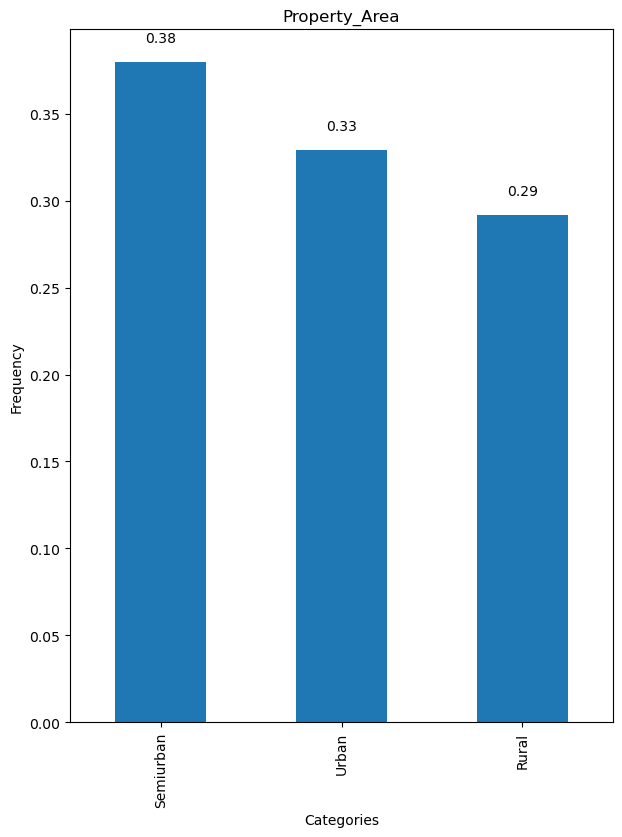

In [14]:
# Property_Area Attribute
count = raw_data_copy['Property_Area'].value_counts('normalize=True')
plt.figure(figsize=(7, 9))
chart = count.plot.bar(title='Property_Area', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

***Insight Gained:***
- 0.38 or 38% of the people are located in the semi-urban area (i.e Property_Area = Semiurban)
- 0.33 or 33% of the people are located in the urban area (i.e Property_Area = Urban)
- 0.29 or 29% of the people are located in the rural area(i.e Property_Area = Rural)

### *Independent Attributes (Nominal)*
Nominal data does not have any kind of order or hierarchy but rather each category are different from each other. For example, the different breeds of dogs (Labrador, Beagle, Poodle) constitute nominal data because there is no inherent order among them.

A distribution chart is used to visualise the distribution of the values in the attributes ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term.

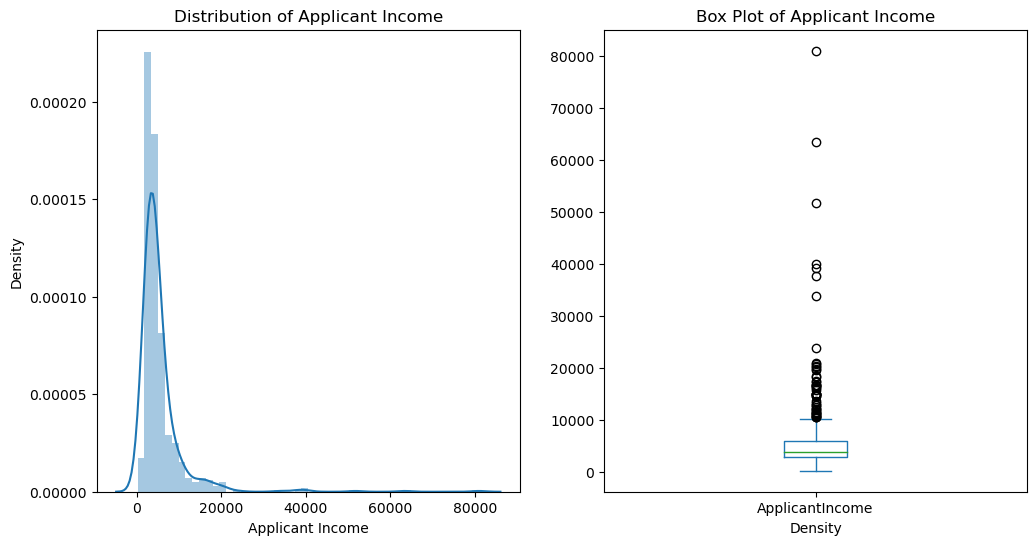

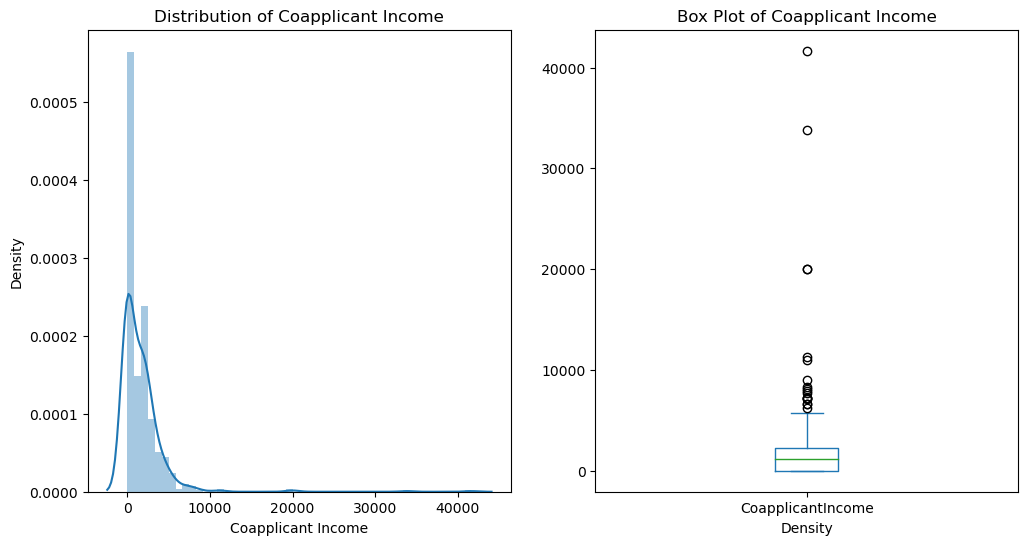

In [15]:
plt.figure(1, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna()  # Drop missing data in the attribute's data
sns.distplot(raw_data_copy['ApplicantIncome'])
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Density')
plt.subplot(122)
boxplot = raw_data_copy['ApplicantIncome'].plot.box()
boxplot.set_title('Box Plot of Applicant Income')
boxplot.set_xlabel('Density')
plt.show()

plt.figure(2, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['CoapplicantIncome'])
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Density')
plt.subplot(122)
boxplot = raw_data_copy['CoapplicantIncome'].plot.box()
boxplot.set_title('Box Plot of Coapplicant Income')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
  - Both the distribution charts of the ApplicantIncome and CoapplicantIncome show a left-skewed distribution that indicates a 
    majority of the applicants have lower incomes.
  - This pattern reflects income inequality within the applicant pool.

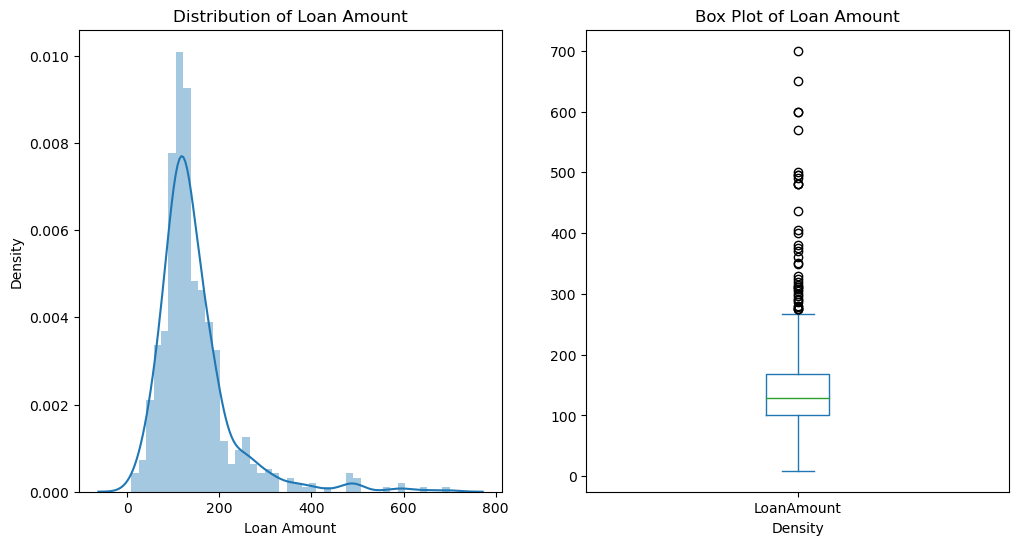

In [16]:
plt.figure(3, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna() 
sns.distplot(raw_data_copy['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['LoanAmount'].plot.box()
boxplot.set_title('Box Plot of Loan Amount')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- Overall the distribution of the data is fairly normal.
- There are outliers in this attribute which could negatively impact the mean and distribution of the data 
- These outliers will be treated in the data cleaning process

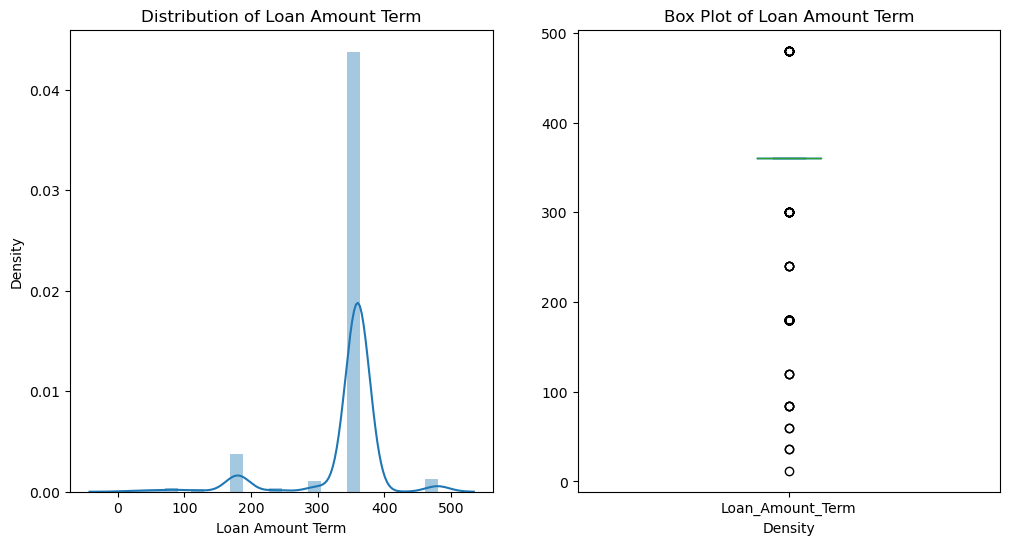

In [17]:
plt.figure(4, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna() 
sns.distplot(raw_data_copy['Loan_Amount_Term'])
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['Loan_Amount_Term'].plot.box()
boxplot.set_title('Box Plot of Loan Amount Term')
boxplot.set_xlabel('Density')
plt.show()

***Insight Gained:***
- The peak around 360 indicates a standard loan term.
- Smaller peaks at lower values show that shorter loan terms are less common.

## C. Bi-variate Analysis

When there are two variables in the data it is called bi-variate analysis. The data is analyzed to find the relationship between the dependent and independent variables. Stacked bar graphs can be utilised to view the correlation between the coefficients.

The graphs created below will display how the Dependent Attribute ‘Loan_Status’ is distributed within each Independent Attribute, regardless of how many observations there are.

### *Categorical Independent Variables and Dependent Variable LoanAmount:*

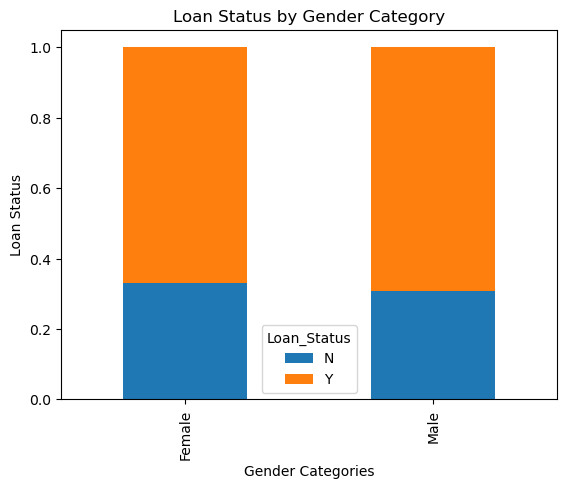

In [18]:
# Loan_Status vs Gender
gender_table = pd.crosstab(raw_data_copy['Gender'], raw_data_copy['Loan_Status'])
gender_table.div(gender_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Gender Category')
plt.xlabel('Gender Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
  - The proportion of the loan status ‘Yes’ is slightly higher for males, indicating a marginally higher approval rate compared
    to females.
  - For both genders, the majority of the loan status is ‘Yes’, suggesting that most applicants in the dataset were approved for 
    a loan.

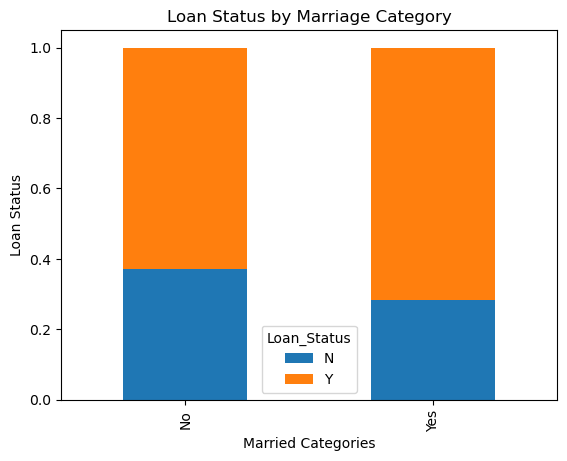

In [19]:
# Loan_Status vs Married
married_table = pd.crosstab(raw_data_copy['Married'], raw_data_copy['Loan_Status'])
married_table.div(married_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Marriage Category')
plt.xlabel('Married Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
  - The ‘Yes’ category shows a higher proportion for the loan status ‘Yes’, suggesting that married individuals may have a better 
    chance of loan approval.
  - Conversely, the ‘No’ category has a higher proportion for the loan status ‘No’, indicating that unmarried individuals may 
    face more rejections.

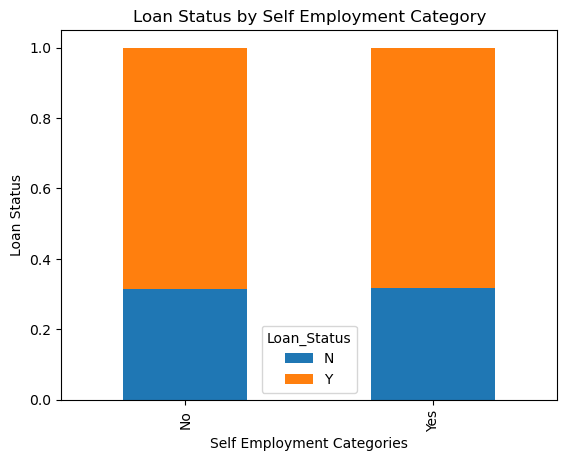

In [20]:
# Loan_Status vs Self_Employed
self_employed_table = pd.crosstab(raw_data_copy['Self_Employed'], raw_data_copy['Loan_Status'])
self_employed_table.div(self_employed_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Self Employment Category')
plt.xlabel('Self Employment Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
  - The ‘Yes’ loan status is present in both self-employment categories, but there is a slightly larger proportion of 
    approvals for individuals who are not self-employed (‘No’) compared to those who are self-employed (‘Yes’).
  - Self-Employment Impact: The graph suggests that being self-employed might have a slight impact on loan approval rates, 
    although the difference is not substantial.

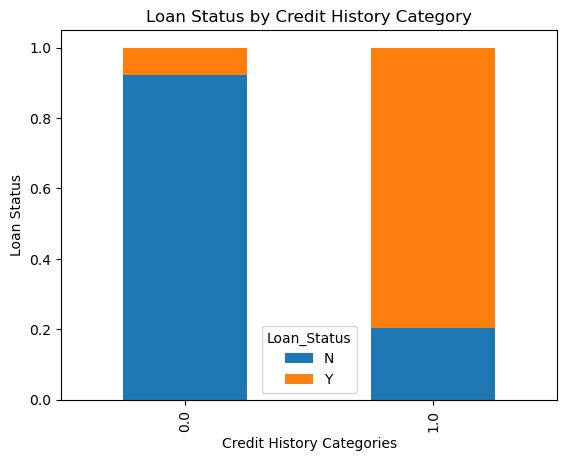

In [21]:
# Loan_Status vs Credit_History
credit_history_table = pd.crosstab(raw_data_copy['Credit_History'], raw_data_copy['Loan_Status'])
credit_history_table.div(credit_history_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit History Category')
plt.xlabel('Credit History Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
  - Individuals in Credit History Category ‘1’ have a higher proportion of getting approval for a loan, indicating a 
    positive correlation between a good credit history and loan approval.
  - Category ‘0’ has a higher proportion of being rejected for a loan approval, suggesting that a poor credit history is 
    associated with higher loan rejections.

### *Ordinal Independent Variables and Dependent Variable LoanAmount*

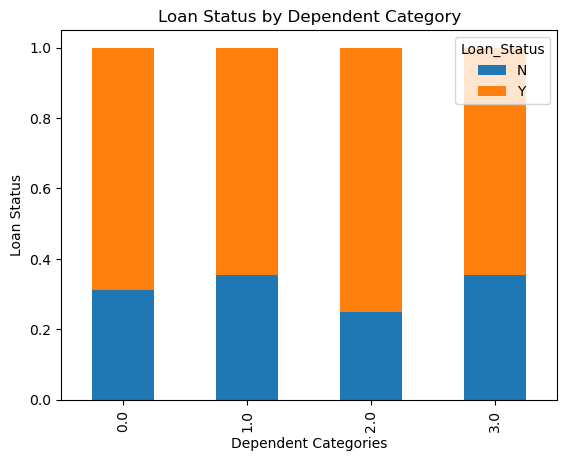

In [22]:
# Loan_Status vs Dependents
dependents_table = pd.crosstab(raw_data_copy['Dependents'], raw_data_copy['Loan_Status'])
dependents_table.div(dependents_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Dependent Category')
plt.xlabel('Dependent Categories')
plt.ylabel('Loan Status')
plt.show()

***Insight Gained:***
  - The ‘Yes’ loan status is present across all dependent categories, but there is a trend where the proportion of 
    approvals decreases as the number of dependents increases.
  - The graph suggests that having more dependents might negatively impact the rate of loan approval.

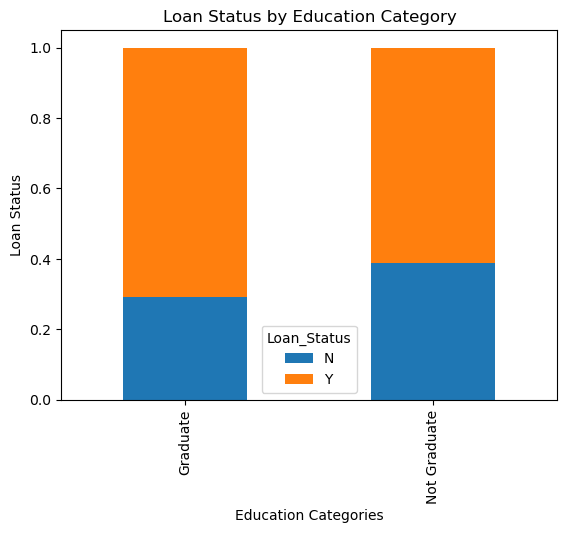

In [23]:
# Loan_Status vs Education
education_table = pd.crosstab(raw_data_copy['Education'], raw_data_copy['Loan_Status'])
education_table.div(education_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Education Category')
plt.xlabel('Education Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - A larger proportion of graduates have their loans approved (‘Y’) compared to non-graduates who have a higher 
    proportion of being rejected (‘N’).

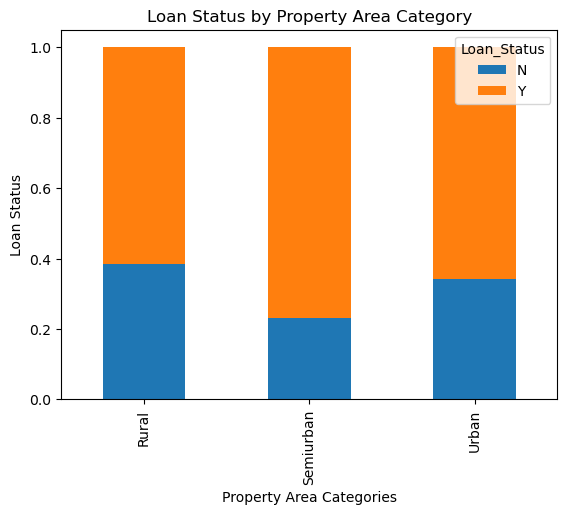

In [24]:
# Loan_Status vs Property Area
property_area_table = pd.crosstab(raw_data_copy['Property_Area'], raw_data_copy['Loan_Status'])
property_area_table.div(property_area_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Property Area Category')
plt.xlabel('Property Area Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - The Semiurban areas have the highest proportion of approved loans (‘Y’), suggesting a favorable outcome for loan 
    applicants in these areas.
  - The Rural area has the lowest proportion of approved loans, indicating potential challenges or stricter criteria for 
    loan approval.
  - Urban Observations: The Urban area has a moderate proportion of approved loans, falling between the Rural and 
    Semiurban areas.

### *Numerical Independent Variables and Dependent Variable LoanAmount*
The purpose of this section is to provide insight into how the income levels (both individually and combined with co-applicants) relate to the likelihood of a loan being approved. In order to determine the impact of the income on the Loan_Status, the mean income is calculated to determine who's loans were approved vs who's were not.

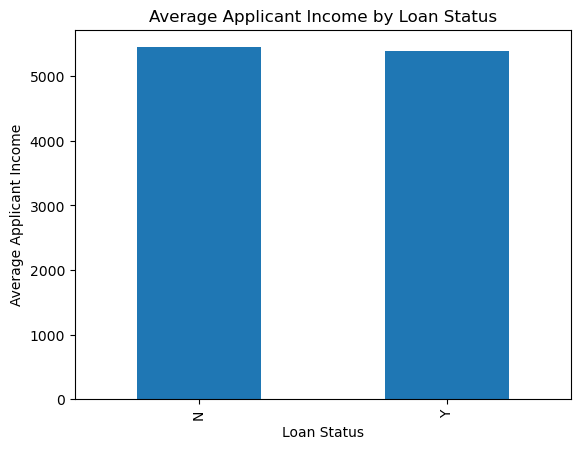

In [25]:
# Loan_Status vs Applicant_Income
raw_data_copy.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.title('Average Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Applicant Income')
plt.show()

ApplicantIncome is categorized in loans within each income bracket. This will access whether different income levels, when the applicant income and the co-applicant income are added together, will influence the Loan approval rate.

Binning will transform the continuous numerical variables into discrete categorical ‘bins’. Income brackets such as "Low", "Average", "Above Average", and "High" are used to provide a qualitative understanding of the ranges in the data.

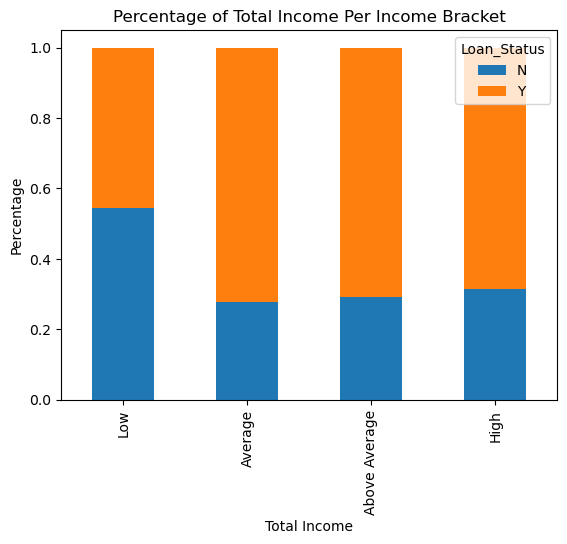

In [26]:
# Loan_Status vs Total Income
# Combine the applicant income and co-applicant income together
raw_data_copy['Total_Income']=raw_data_copy['ApplicantIncome']+raw_data_copy['CoapplicantIncome']

# Calculate the bin values
low = raw_data_copy['ApplicantIncome'].quantile(0.25) # 25th percentile
average = raw_data_copy['ApplicantIncome'].quantile(0.50) # 50th percentile
above_average = raw_data_copy['ApplicantIncome'].quantile(0.75) # 75th percentile
high = 81000

bins = [0, low, average, above_average, high]
group=['Low','Average','Above Average','High']

raw_data_copy['Total_Income_bin']=pd.cut(raw_data_copy['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(raw_data_copy['Total_Income_bin'],raw_data_copy['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Total Income Per Income Bracket')
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

##### ***Insight Gained:***
  - The proportion of loans approved for applicants with low total income is significantly lower than for other income groups.
  - Applicants with average, high, and very high total income have a greater proportion of loan approvals.
  - The chart suggests that total income level may impact the likelihood of loan approval.
  - This analysis indicates that higher income levels are associated with better chances of loan approval, highlighting the 
    importance of income in the loan decision process.

Loan amount is categorized in loans within each loan bracket. This will access whether different loan amounts will influence the Loan approval rate.

Loan brackets such as "Low", "Average", and "High" are used to provide a qualitative understanding of the ranges in the data.

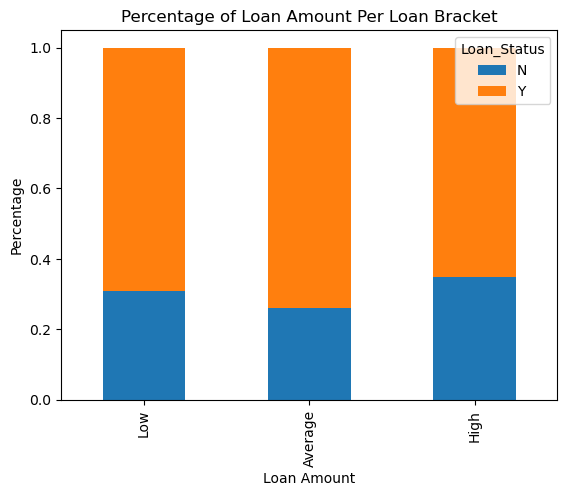

In [27]:
# Loan_Status vs Loan Amount
# Calculate the bin values
low = raw_data_copy['LoanAmount'].quantile(0.333) # 33.3th percentile
average = raw_data_copy['LoanAmount'].quantile(0.666) # 66.6th percentile
high = 700

bins = [0, low, average, high]
group=['Low','Average','High']

raw_data_copy['Loan_Amount_bin']=pd.cut(raw_data_copy['LoanAmount'],bins,labels=group)
Total_Income_bin=pd.crosstab(raw_data_copy['Loan_Amount_bin'],raw_data_copy['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Loan Amount Per Loan Bracket')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

##### ***Insight Gained:***
  - Low and Average Loan Amounts: The proportion of approved loans is higher for these categories, indicating a greater 
    likelihood of approval for smaller loan amounts.
  - High Loan Amount: The proportion of approved loans is lower for this category, suggesting that larger loan amounts may have a 
    reduced chance of approval.
  - Therefore it can be said that loans with lower amounts are more likely to be approved.

We must now remove all bins created to avoid redundancy and reduce data complexity.

In [28]:
# Drop all bins created:
raw_data_copy=raw_data_copy.drop(['Loan_Amount_bin','Total_Income_bin','Total_Income'],axis=1)

Heatmaps are a powerful visualization tool that display data through variations in coloring. When used with datasets, the colors correspond to the values in each cell of a matrix. Darker colors typically represent higher correlation values (either positive or negative), while lighter colors represent lower correlation values or no correlation. This allows for an intuitive, visual interpretation of how different numerical attributes relate to each other in the dataset.

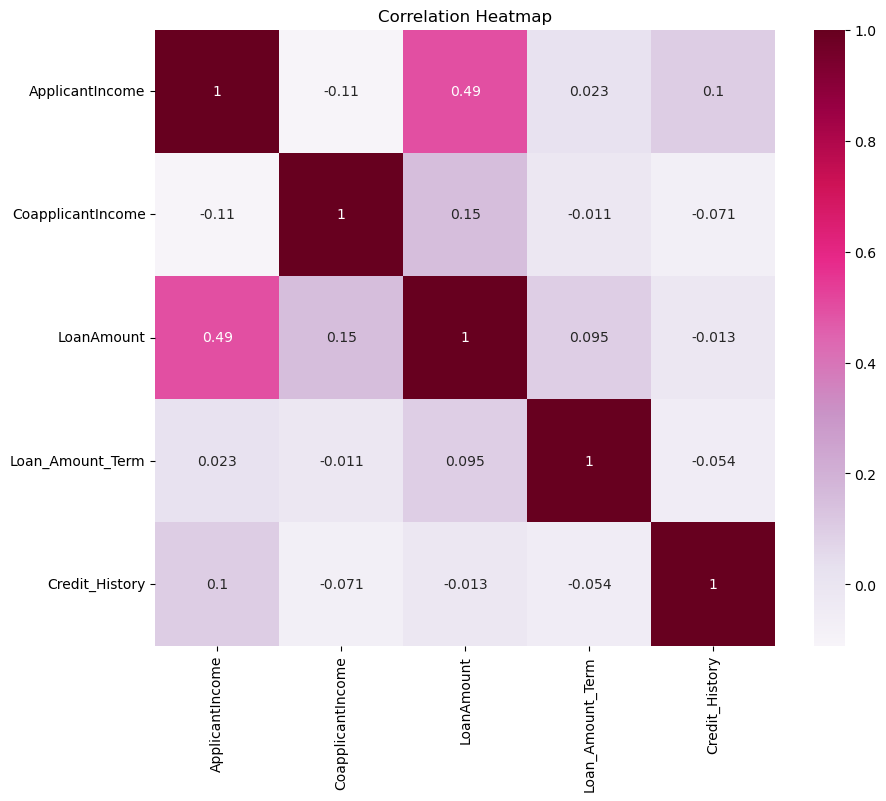

In [29]:
numeric_cols = validation_data_copy.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()

##### ***Insight Gained:***

- Moderate Correlation: 
    ApplicantIncome and LoanAmount have a moderate positive correlation, suggesting that as applicant income increases, the 
    loan amount tends to increase as well.

- Credit History Impact: 
    The moderate positive correlation between Credit_History and Loan_Status indicates that applicants with a good credit 
    history are more likely to have their loans approved.

- Coapplicant Contribution: 
    While there is a positive correlation between LoanAmount and CoapplicantIncome, it is relatively weak, implying that co-
    applicant income has a lesser impact on the loan amount compared to the primary applicant’s income.

- Overall, the heatmap suggests that both income and credit history play significant roles in loan amount determination and 
    approval. The weaker correlation for CoapplicantIncome may indicate that lenders prioritize the primary applicant’s financial 
    status.

Having now seen how the different attributes impact the outcome in our datasets, several hypotheses can be drawn from the results.

===================================================================================
# **2. Hypotheses**

The aim of this project is to use machine learning to transform BC Finance's loan approval process. BC Finance seeks to mitigate the inefficiencies linked to manual validation, including longer application periods, higher error rates, and lower customer satisfaction, by automating the real-time eligibility evaluation process. By using this automated approach, BC Finance hopes to improve resource allocation, boost operational efficiency, and ultimately become more competitive in the financial market.

The _'prepare_data.py'_ file is essential in this situation as it organizes several data pretreatment and exploratory analysis activities. By carefully going over the dataset, which includes factors like gender, marital status, income levels, credit history, and property location, this script reveals important information that serves as the foundation for the phases of model construction and hypothesis formulation that follow.

- __Hypothesis 1__: The likelihood of loan approval is positively impacted by having a good credit history. 
    - Justification: Bi-variate analysis shows a moderately positive correlation between Credit_History and Loan_Status, indicating that applicants with a good credit history are more likely to have their loans approved. 

- __Hypothesis 2__: Loan amounts in the low to average range are more likely to be approved 
    than high loan amounts. 
    - Justification: Bi-variate analysis shows that the proportion of approved loans is higher for low and average loan amounts, indicating a greater likelihood of approval for smaller loan amounts. 

- __Hypothesis 3__: An applicant's marital status may have an impact on loan approval rates. 
    - Justification: Bi-variate analysis displays differences in loan approval rates for married individuals compared to unmarried individuals.

- __Hypothesis 4__: The type of property—rural, semi-urban, or urban—may affect the likelihood of a loan being approved. 
    - Justification: variable property areas have variable loan approval rates, as shown by univariate analysis. As an illustration, the percentage of loans that are authorized is higher in semi-urban areas than in urban and rural areas.

- __Hypothesis 5__: There is a positive correlation between income levels and loan acceptance rates. 
    - Justification: According to univariate research, applicants with higher earnings typically receive a higher percentage of loan approvals. This implies that judgments about loan approval may be significantly influenced by an individual's income level.

===================================================================================

# **3. PREPROCESS THE DATA**


Through the analysis process, it can be seen that the data required cleaning. The most important step is to import the necessary libraries and read in the relevant CSV files.

In [30]:
raw_data = pd.read_csv('raw_data.csv')
raw_data_copy = raw_data.copy()

validation_data = pd.read_csv('validation.csv')
validation_data_copy = validation_data.copy()

## 1. Attribute Name Standardization Process for both dataset
Based on the insight gained from analysing the datasets, it was seen that the attribute names were inconsistant therefore the attribute require a renaming. Using a dictionary, the attribute names will be replaced with a standardised naming convention of Capitalised first letters and underscores ( _ ) between each word to join them.

In [31]:
# Create a dictionary to map the old column names to the new ones to format the column names
raw_column_name_mapping = {
    'Loan_ID': 'Loan_ID',
    'Gender': 'Gender',
    'Married': 'Married',
    'Dependents': 'Dependents',
    'Education': 'Education',
    'Self_Employed': 'Self_Employed',
    'ApplicantIncome': 'Applicant_Income',
    'CoapplicantIncome': 'Coapplicant_Income',
    'LoanAmount': 'Loan_Amount',
    'Loan_Amount_Term': 'Loan_Amount_Term',
    'Credit_History': 'Credit_History',
    'Property_Area': 'Property_Area',
    'Loan_Status': 'Loan_Status'
}

validation_column_name_mapping = {
    'Loan_ID': 'Loan_ID',
    'Gender': 'Gender',
    'Married': 'Married',
    'Dependents': 'Dependents',
    'Education': 'Education',
    'Self_Employed': 'Self_Employed',
    'ApplicantIncome': 'Applicant_Income',
    'CoapplicantIncome': 'Coapplicant_Income',
    'LoanAmount': 'Loan_Amount',
    'Loan_Amount_Term': 'Loan_Amount_Term',
    'Credit_History': 'Credit_History',
    'Property_Area': 'Property_Area'
}

raw_data_copy.rename(columns=raw_column_name_mapping, inplace=True)
validation_data_copy.rename(columns=validation_column_name_mapping, inplace=True)

#Check the changes made to the columns
print(f"Raw Data Columns:\n{raw_data_copy.columns}\n")
print(f"Validation Data Columns:\n{validation_data_copy.columns}\n")

Raw Data Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

Validation Data Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')



## 2. Checking for missing values in both datasets
Ensuring that the datasets have no missing values is essencial because missing values can significantly impact the quality and performance of the machine learning models. Missing data can lead to biased or incorrect results, reduce the statistical power of the model, and make the data harder to interpret. Therefore, it’s crucial to handle missing values appropriately, either by filling them in using a suitable method (like mean, median, or mode imputation), or by removing the instances or features with missing values, depending on the nature and amount of the missing data.

In [32]:
print(f"Number of Missing Values in raw_data_copy:\n{raw_data_copy.isnull().sum()}\n")
print(f"Number of Missing Values in validation_data_copy:\n{raw_data_copy.isnull().sum()}")

Number of Missing Values in raw_data_copy:
Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

Number of Missing Values in validation_data_copy:
Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64


Based on the results above, it can be seen that there are missing values in the following attributes for both data sets:

- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

In order to fill in the missing values the attributes need to be split into **Categorical** and **Numerical** attributes.

#### ***Categorical Attributes***
The *mode* of all the values in the attribute to fill in the missing data values.
For example:

- Gender (Male or Female)
- Married (Yes or No)
- Dependents (0, 1, 2, or 3+)
- Self_Employed (Yes or No)
- Credit_History (1 or 0)

In [33]:
raw_data_copy['Gender'].fillna(raw_data_copy['Gender'].mode()[0],inplace=True)
raw_data_copy['Married'].fillna(raw_data_copy['Married'].mode()[0],inplace=True)
raw_data_copy['Dependents'].fillna(raw_data_copy['Dependents'].mode()[0],inplace=True)
raw_data_copy['Self_Employed'].fillna(raw_data_copy['Self_Employed'].mode()[0],inplace=True)
raw_data_copy['Credit_History'].fillna(raw_data_copy['Credit_History'].mode()[0],inplace=True)

validation_data_copy['Gender'].fillna(validation_data_copy['Gender'].mode()[0],inplace=True)
validation_data_copy['Married'].fillna(validation_data_copy['Married'].mode()[0],inplace=True)
validation_data_copy['Dependents'].fillna(validation_data_copy['Dependents'].mode()[0],inplace=True)
validation_data_copy['Self_Employed'].fillna(validation_data_copy['Self_Employed'].mode()[0],inplace=True)
validation_data_copy['Credit_History'].fillna(validation_data_copy['Credit_History'].mode()[0],inplace=True)

#### ***Numerical Attributes***
Either the *mean* or *median* of the values is used to fill in the missing data values. In the case of our dataset, median is used instead of mean due to the outliers in the attribute data which could negatively impact the outcome.

In [34]:
raw_data_copy['Loan_Amount'].fillna(raw_data_copy['Loan_Amount'].median(),inplace=True)
raw_data_copy['Loan_Amount_Term'].fillna(raw_data_copy['Loan_Amount_Term'].median(),inplace=True)

validation_data_copy['Loan_Amount'].fillna(validation_data_copy['Loan_Amount'].median(),inplace=True)
validation_data_copy['Loan_Amount_Term'].fillna(validation_data_copy['Loan_Amount_Term'].median(),inplace=True)

#Check to see whether the missing values have been added
print(f"Number of Missing Values in raw_data_copy:\n{raw_data_copy.isnull().sum()}\n")
print(f"Number of Missing Values in validation_data_copy:\n{raw_data_copy.isnull().sum()}")

Number of Missing Values in raw_data_copy:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Number of Missing Values in validation_data_copy:
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


## 3. Handling Duplicates
Having resolved the missing values in the datasets, we run the risk of producing duplicate records. To resolve this we need to identify and remove these duplicates. This can be done using various techniques such as the 'drop_duplicates' function in pandas, which removes duplicate rows based on all or selected columns. 

Removing duplicates is crucial as they can skew the results of the data analysis and lead to incorrect conclusions.

In [35]:
print(f"Number of duplicate rows in raw_data_copy: {raw_data_copy.duplicated().sum()}")
print(f"Number of duplicate rows in validation_data_copy: {validation_data_copy.duplicated().sum()}\n")

Number of duplicate rows in raw_data_copy: 0
Number of duplicate rows in validation_data_copy: 0



As there are no duplicate records found in either of the datasets, no records need to be dropped.

## 4. Outlier Data Handling
The next step to clean our data is to perform outlier handling. Outlier data handling can take place through the use of log transformations. Log transformations are beneficial as they reduce the impact of extreme values or outliers by compressing the scale of the data. 

This transformation also improves interpretability by expressing data in orders of magnitude, making large numbers more intuitive. Lastly, it’s particularly useful when the data is skewed, as it can transform the skewed data to approximate a normal distribution.

#### ***Loan Amount***
During the analysis process conducted on the datasets, it was noted that there was a partially normally distributed. Therefore, log transformation is required to normally distribute the data. A distribution graph and a box plot graph is created to visually see the transformations.

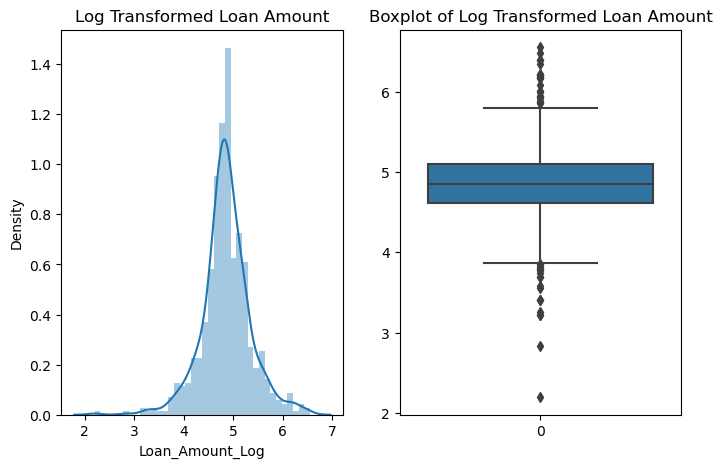

In [36]:
raw_data_copy['Loan_Amount_Log'] = np.log(raw_data_copy['Loan_Amount'])
validation_data_copy['Loan_Amount_Log'] = np.log(validation_data_copy['Loan_Amount'])

# Raw Data
plt.figure(1, figsize=(8,5))
plt.subplot(121)
sns.distplot(raw_data_copy['Loan_Amount_Log'])
plt.title('Log Transformed Loan Amount')
plt.subplot(122)
sns.boxplot(raw_data_copy['Loan_Amount_Log'])
plt.title('Boxplot of Log Transformed Loan Amount')
plt.show()

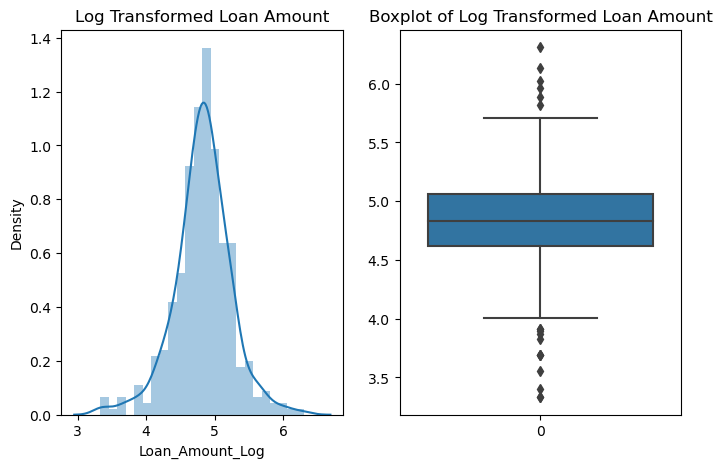

In [37]:
# Validation Data
plt.figure(1, figsize=(8,5))
plt.subplot(121)
sns.distplot(validation_data_copy['Loan_Amount_Log'])
plt.title('Log Transformed Loan Amount')
plt.subplot(122)
sns.boxplot(validation_data_copy['Loan_Amount_Log'])
plt.title('Boxplot of Log Transformed Loan Amount')
plt.show()

## 5. Data Transformation
Data Transformation can be used to help improve the quality and reliability of the data, making it more suitable for data analysis. Furthermore, it can help in reducing data redundancy and improving data storage efficiency.

#### ***Dependents***
The *'Dependents'*  attribute values have the following categories: **(0, 1, 2, 3+}**. As you can see the first 3 options are numerical whereas the last ***"3+"*** is a string. This can cause issues during the building of our models, as logistic regression models only takes numerical values. To rectify this the value ***"3+"*** is replaced by the numerical value ***"3"***.

In [38]:
raw_data_copy['Dependents'].replace('+3',3,inplace=True)
validation_data_copy['Dependents'].replace('+3',3,inplace=True)

Having done this we can resolve the inconsistancy of the *'Dependents'* datatypes. In the raw_data dataset the attribute *'Dependents'* has the datatype ***"object"***, whereas in the validation_data dataset the attribute has a ***"float64"*** datatype. To resolve this the datatype of the attribute *'Dependents'* in validation_data_copy is converted to ***"object"*** to match the datatype in the raw_data dataset.

In [39]:
raw_data_copy['Dependents'] = raw_data_copy['Dependents'].astype('object')
print(f"Dependents datatype: {raw_data_copy['Dependents'].dtypes}\n")

Dependents datatype: object



#### ***Loan Status***
The Loan_Status values ***"Yes and No"*** are replaced by ***"1 and 0"*** as we know that logistic regression models only take numerical values.

In [40]:
raw_data_copy['Loan_Status'].replace('N',0,inplace=True)
raw_data_copy['Loan_Status'].replace('Y',1,inplace=True)

#Check the replacement was successful
print(f"Values in {raw_data_copy['Loan_Status'].value_counts()}\n")

Values in Loan_Status
1    422
0    192
Name: count, dtype: int64



## 6. Remove attributes that do not affect the target attribute 'Loan_Status'

Attributes that have no effect on the attribute ‘Loan_Status’ are removed. This will reduce the noise in the datasets as well as improve the efficiency of the data analysis process. By focusing only on the relevant attributes, we can prevent overfitting, enhance the interpretability of our models, and speed up the training process. Ultimately, this step helps to ensure that our predictive model is both accurate and robust.

In both datasets the 'Loan_ID' attribute has no effect on the target attribute.

In [41]:
raw_data_copy.drop('Loan_ID',axis=1,inplace=True)
validation_data_copy.drop('Loan_ID',axis=1,inplace=True)

## 7. Write the new datasets to CSV files
The clean datasets are now written to csv files to be split and used during the model building phases.

In [42]:
raw_data_copy.to_csv('cleaned_raw_data.csv', index=False)
validation_data_copy.to_csv('cleaned_validation_data.csv', index=False)

===================================================================================
# **4. SPLIT THE RAW DATA INFORMATION**
The use of dummy data is a common practice to transform categorical data into a binary format, specifically 0’s and 1’s. This transformation assists with  easier quantification and comparisons in future models. For instance, consider the *‘Gender’* attribute, which includes **‘Male’** and **‘Female’** categories. By employing the ‘dummies’ function from pandas, these categories are converted into binary form, where **‘Gender_Male’** is represented as **'1'** and **‘Gender_Female’** as **'0'**.

When it comes to splitting the data into training and testing sets, a typical weightage of **80% (0.8)** is assigned to the *training* dataset, while the remaining **20% (0.2)** is allocated to the *testing* dataset. Additionaly, to ensure the consistency of the train/test split across multiple executions of the code, **‘random_state=42’** is used. This guarantees that the same train/test split is reproduced every time the code is run, thereby ensuring reproducibility.

In [43]:
# Read Cleaned CSV Files
cleaned_raw_data = pd.read_csv('cleaned_raw_data.csv')
cleaned_raw_data_copy = cleaned_raw_data.copy()

# Define the independent variables (features) and the target variable
X = cleaned_raw_data_copy.drop('Loan_Status', axis=1)  # all columns except 'Loan_Status'
y = cleaned_raw_data_copy['Loan_Status']  # only 'Loan_Status' column

# Convert categorical variable in the X dataset(all columns except 'Loan_Status') into dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the training and testing sets to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

===================================================================================

Now that we have our training and test data, we can move onto building the initial model.

# **5. MODEL 1**

## A. Build the Model
A **Logistics Regression** model will be built using the train_data dataset and fit it to the model, whereas the test_data dataset will be used to predict the outcomes of the target attribute and compare the predictions to the actual answer to determin the accuracy of the model that was created.

In [44]:
# Create a Logistic Regression model and Fit the model with the training data
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Calculate the accuracy score for the predictions of the model
test_predictions = model1.predict(X_test)
print(f"Accuracy Score for Predictions: {accuracy_score(y_test,test_predictions)}")

Accuracy Score for Predictions: 0.7723577235772358


***Insight Gained:***
- The model shows it can accurately predict 77.24% of the Loan_Status values correctly.

Cross validation will be used on the predictions generated by the model to check its validity.

#### **Cross Validation model 1**
Stratified K-Fold Cross Validation method is used. This variation of k-fold cross-validation is used when the target variable is imbalanced. It ensures that each fold is a good representative of the whole dataset. The average for all the iterated accuracy scores is calculated to determin the overall accuracy of the model.

In [45]:
# Perform Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5)
cross_val_predictions = cross_val_predict(model1, X, y, cv=skf)

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
i = 1
scores = [] 
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    scores.append(score)
    print('accuracy_score:', score)
    i += 1

# Calculate the mean validation accuracy score
mean_score = np.mean(scores)
print(f"\nMean validation accuracy score: {mean_score}")


1 of kfold 5
accuracy_score: 0.7723577235772358

2 of kfold 5
accuracy_score: 0.7967479674796748

3 of kfold 5
accuracy_score: 0.7642276422764228

4 of kfold 5
accuracy_score: 0.7967479674796748

5 of kfold 5
accuracy_score: 0.7786885245901639

Mean validation accuracy score: 0.7817539650806344


***Insight Gained:***

  - The difference between the two accuracy scores can be attributed to the fact that cross-validation provides a 
    more robust measure of the model’s performance.
  - In cross-validation, the model is trained and tested on different subsets of the data, which helps to ensure 
    that the model’s performance is not overly dependent on the specific way the data was split into training and
    test sets.
  - The higher mean validation accuracy score suggests that the model’s performance may be slightly better than what
    was observed on the initial test set.


## B. Predictions of the Model
All the predictions generated from the first model are stored in CSV files

In [46]:
# Remove the data from the Logistic Regression model Predictions.csv file to prevent duplicate storage
open('Log_Reg_Mod1_Predictions.csv', 'w').close()
open('Log_Reg_Mod1_Cross_Validate_Predictions.csv', 'w').close()

# Save the predictions to a CSV file
predictions_df = pd.DataFrame(test_predictions, columns=['Predictions'])
predictions_df.index.names = ['Index']
predictions_df.to_csv('Log_Reg_Mod1_Predictions.csv', mode='a', header=True)

# Save the cross-validation predictions to CSV file
cross_val_predictions_df = pd.DataFrame(pred_test, columns=['Cross Validation Predictions'])
cross_val_predictions_df.index.names = ['Index']
cross_val_predictions_df.to_csv('Log_Reg_Mod1_Cross_Validate_Predictions.csv', mode='a', header=True)

# Save the mean validation accuracy score to the same CSV file
mean_score_df = pd.DataFrame([mean_score], columns=['Mean Validation Accuracy Score'])
mean_score_df.to_csv('Log_Reg_Mod1_Cross_Validate_Predictions.csv', mode='a', header=False)

## C. Feature Importance from the Model
Feature engineering transforms or combines raw data into a format that can be easily understood by machine learning models.
Creates predictive model features, also known as a dimensions or variables, to generate model predictions.
This highlights the most important patterns and relationships in the data, which then assists the machine learning model to learn from the data more effectively.

#### **Feature 1: Total Income**
*'Total_Income'* is the first feature that can be created. It is achieved through the addition of the *'Applicants_Income'* and the *'Coapplicant_Income'*. The Total_Income is then normalised to reduce the affects of the extreme values that could arise from the addition of the two attributes. A distribution chart is created to visually see the new feature and its distribution.

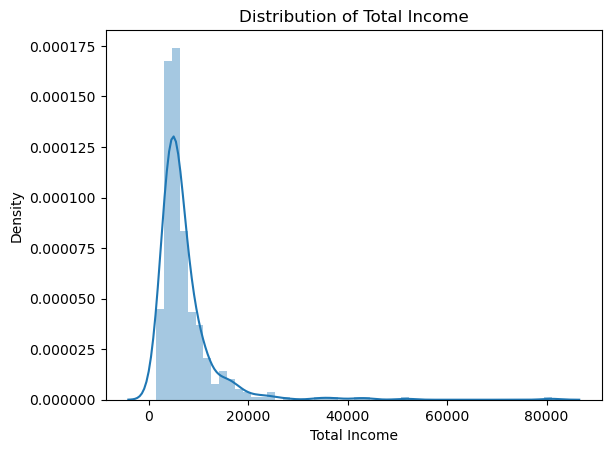

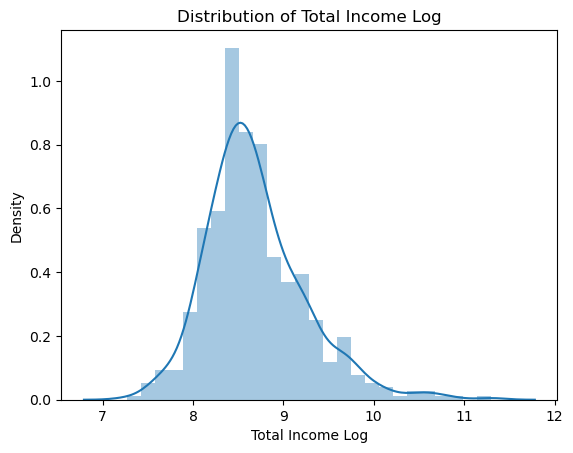

In [47]:
train_data['Total_Income']=train_data['Applicant_Income']+train_data['Coapplicant_Income']
test_data['Total_Income']=test_data['Applicant_Income']+test_data['Coapplicant_Income']

#Distribution normalization
sns.distplot(train_data['Total_Income'])
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Density')
plt.show()

train_data['Total_Income_Log']=np.log(train_data['Total_Income'])
test_data['Total_Income_Log']=np.log(test_data['Total_Income'])

sns.distplot(train_data['Total_Income_Log'])
plt.title('Distribution of Total Income Log')
plt.xlabel('Total Income Log')
plt.ylabel('Density')
plt.show()

#### **Feature 2: Equated Monthly Installment (EMI)**
The second feature we can create is an *'EMI'* attribute. It can be created by dividing the *‘Loan_Amount’* by the *‘Loan_Amount_Term’*. This feature gets the monthly payment amount for a loan, given the total loan amount and the term of the loan. Overall this will give an indication of the individuals monthly financial obligation towards the loan.

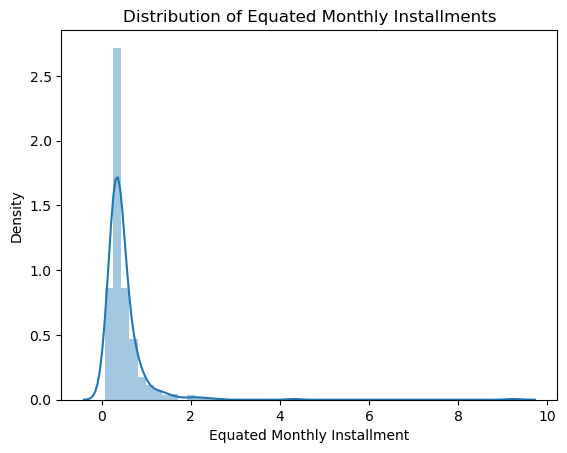

In [48]:
train_data['EMI']=train_data['Loan_Amount']/train_data['Loan_Amount_Term']
test_data['EMI'] = test_data['Loan_Amount']/test_data['Loan_Amount_Term']

sns.distplot(train_data['EMI'])
plt.title('Distribution of Equated Monthly Installments')
plt.xlabel('Equated Monthly Installment')
plt.ylabel('Density')
plt.show()

#### **Feature 3: Income After EMI**
Lastly, a feature called "Income After EMI" can be created by dividing the ‘Loan_Amount’ by the ‘Loan_Amount_Term’ to get the monthly payment amount for a loan. This will give an indication of the individuals monthly financial obligation towards the loan. The 'EMI' feature is multiplied with 1000 to make the unit equal to the 'Total_Income' unit.

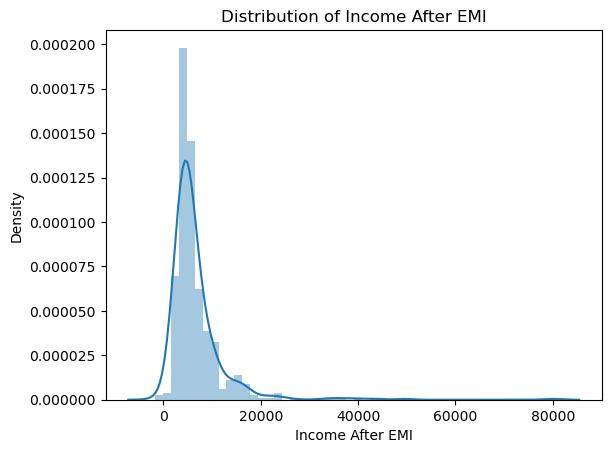

In [49]:
#Feature 3: Income After EMI
train_data['Income_After_EMI']=train_data['Total_Income']-(train_data['EMI']*1000)
test_data['Income_After_EMI']=test_data['Total_Income']-(test_data['EMI']*1000)

sns.distplot(train_data['Income_After_EMI'])
plt.title('Distribution of Income After EMI')
plt.xlabel('Income After EMI')
plt.ylabel('Density')
plt.show()

#### **Remove all features that created the new features**
The last step in the feature engineering section is to remove all the attributes used to create the new features. This is due to the high correlation between those old attributes and the new features. A Logistic regression model assumes that the attributes are not highly correlated. Therefore any excess noise in the datasets are removed. The new features are stored into a CSV file for use in the second model.

In [50]:
train_data=train_data.drop(['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'],axis=1)
test_data=test_data.drop(['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'],axis=1)

#Check to see if the attributes have been removed
print(f"Training Data Columns: {train_data.columns}\n")
print(f"Testing Data Columns:{test_data.columns}\n")

# Store new Features in CSV files
train_data.to_csv('Feature_Importance_train_data_NF_Model1.csv', index=False)
test_data.to_csv('Feature_Importance_test_data_NF_Model1.csv', index=False)

Training Data Columns: Index(['Dependents', 'Credit_History', 'Loan_Amount_Log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status', 'Total_Income', 'Total_Income_Log', 'EMI',
       'Income_After_EMI'],
      dtype='object')

Testing Data Columns:Index(['Dependents', 'Credit_History', 'Loan_Amount_Log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status', 'Total_Income', 'Total_Income_Log', 'EMI',
       'Income_After_EMI'],
      dtype='object')



## D. Create Pickle File

In [51]:
# Save the trained model to a pickle file
with open('Model_1.pkl', 'wb') as f:
    pickle.dump(model1, f)

#View data in the Model_1.pkl file
with open('Model_1.pkl', 'rb') as f:
    data = pickle.load(f)

===================================================================================
# **5. MODEL 2**

The CSV files containing the new features created in the first model are read and duplicated. Following that the data is split into testing and training datasets.

In [52]:
# Read Cleaned CSV Files
New_Features_test = pd.read_csv('Feature_Importance_test_data_NF_Model1.csv')
New_Features_test_copy = New_Features_test.copy()

New_Features_train = pd.read_csv('Feature_Importance_train_data_NF_Model1.csv')
New_Features_train_copy = New_Features_train.copy()

# Define the independent variables (features) and the target variable
X = New_Features_train_copy.drop('Loan_Status', axis=1)  
y = New_Features_train_copy['Loan_Status']  

# Convert categorical variable in the X dataset into dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## A. Build the Model

#### **Artifical Neural Network Model**
For the second model, an Artificial Neural Network model was chosen.

In [53]:
# Define the deep learning model architecture
model2 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_predictions_model2 = model2.predict(X_test)
test_predictions_model2_classes = np.round(test_predictions_model2).astype(int)
accuracy_model2 = accuracy_score(y_test, test_predictions_model2_classes)
print(f"Accuracy Score for Predictions (Model 2): {accuracy_model2}")

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7047 - loss: 461.6729 - val_accuracy: 0.6162 - val_loss: 8.0195
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4408 - loss: 69.2672 - val_accuracy: 0.6667 - val_loss: 60.7566
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6226 - loss: 38.2241 - val_accuracy: 0.6667 - val_loss: 25.0705
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6748 - loss: 22.8723 - val_accuracy: 0.6667 - val_loss: 17.4619
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6592 - loss: 14.5069 - val_accuracy: 0.6667 - val_loss: 14.6127
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6304 - loss: 5.8531 - val_accuracy: 0.6667 - val_loss: 7.4171
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5759 - loss: 6.6008 - val_accuracy: 0.6667 - val_loss: 8.2724
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6079 - loss: 5.4906 - val_accuracy

#Insight Gained:
- The model produced an accuracy of 63.63%.
- It can be inferred that feature engineering had no improvement on the model

## B. Predictions of the Model

In [54]:
# Save the predictions to a CSV file for Model 2
predictions_df_model2 = pd.DataFrame(test_predictions_model2, columns=['Predictions'])

predictions_df_model2.index.names = ['Index']
predictions_df_model2.to_csv('NN_Model2_Predictions.csv', mode='a', header=True)

#### **Cross Validation model 2**
A Decision Tree model is created to cross validate the accuracy of the model. This is due to the feature engineering having no improvement on the above model, therefore another algorithm can be used to cross validate the accuracy score.

In [55]:
i=1
scores = [] 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index] 
    ytr,yvl=y[train_index],y[test_index]
    
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    scores.append(score)
    print('accuracy_score',score)
    i+=1

# Preprocess the test data in the same way as the training data
New_Features_test_copy_processed = pd.get_dummies(New_Features_test_copy.drop('Loan_Status', axis=1))

# Make sure the processed test data has the same columns as the training data
New_Features_test_copy_processed = New_Features_test_copy_processed.reindex(columns = X.columns, fill_value=0)

# Now you can make predictions on the processed test data
pred_test=model.predict(New_Features_test_copy_processed)

# Calculate the mean validation accuracy score
mean_score = np.mean(scores)
print(f"\nMean validation accuracy score: {mean_score}")


1 of kfold 5
accuracy_score 0.7474747474747475

2 of kfold 5
accuracy_score 0.6938775510204082

3 of kfold 5
accuracy_score 0.6836734693877551

4 of kfold 5
accuracy_score 0.7142857142857143

5 of kfold 5
accuracy_score 0.6836734693877551

Mean validation accuracy score: 0.7045969903112761


***Insight Gained:***
- The accuracy of the model using the Decision Tree algorithm results in a 70.46% accuracy.

## C. Feature Importance from the Model
Feature Importance in a model refers to the degree of influence each feature has on the output or prediction made by the model. It quantifies the relevance or contribution of each feature to the predictive power of the algorithm

Feature importance can bring several insights to attention:
- Understanding the Data: The relative scores can highlight which features may be most relevant to the target, and conversely, which features are the least relevant. 
- Understanding the Model: Feature importance scores can provide insight into the model by indicating which features are driving the predictions of the model.

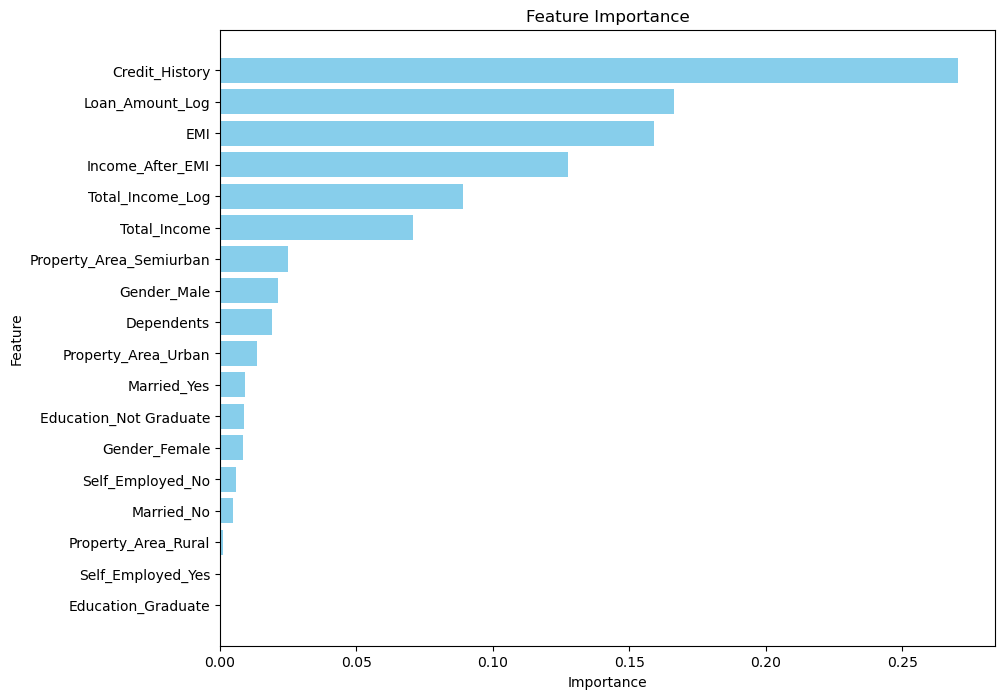

In [56]:
# Create dummy feature importance values
feature_importance_train = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.random.rand(X_train.shape[1])})
feature_importance_test = pd.DataFrame({'Feature': X_test.columns, 'Importance': np.random.rand(X_test.shape[1])})

# Save feature importance values to CSV files
feature_importance_train.to_csv('feature_importance_train_model2.csv', index=False)
feature_importance_test.to_csv('feature_importance_test_model2.csv', index=False)


# Convert the importances into a pandas DataFrame
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

***Insight Gained:***
- The feature ‘Credit_History’ has the highest importance score, indicating it is the most influential factor in the model’s predictions.
- 'Loan_AMount_Log' is the next important feature followed by the features ‘EMI’, ‘Income_After_EMI’,and  ‘Total_Income_Log’.

## D. Create Pickle File

In [57]:
# Save Model 2 as a pickle file
with open('Model_2.pkl', 'wb') as f:
    pickle.dump(model2, f)

## E. Validation of Model 2

***Using validate.csv file for final test of Model 2:***
- This will test the practical implemenation of the model
- Before we can test the model, we need to save it as a Hierarchical Data Format version 5 (HDF5) file format

In [58]:
from tensorflow.keras.models import save_model

# Save Model 2 to an h5 file
save_model(model2, 'Model2.h5')

In [72]:
from keras.models import load_model
import pandas as pd

# Load the trained model
model = load_model('Model2.h5')

# Load the validation data
validate_data = pd.read_csv('validation.csv')

# Preprocess categorical variables (one-hot encoding)
validate_data = pd.get_dummies(validate_data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

# Drop the Loan_ID column
X_validate = validate_data.drop(columns=['Loan_ID'])

# Use the model to make predictions on the validation data
predictions = model.predict(X_validate)

# Convert probability predictions to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Add the binary predictions as a new column to the validation dataframe
validate_data['Loan_Status'] = binary_predictions

# Save the validation dataframe with the predicted target variable
validate_data.to_csv('validate_with_predictions.csv', index=False)


ValueError: could not convert string to float: '3+'